In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import  keras

import wordcloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-06-18 20:54:26.642722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 20:54:26.756563: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 20:54:26.757143: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 20:54:28.202664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/brijesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/brijesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df1 = pd.read_csv("./datasets/sms.csv",delimiter=',')
df2 = pd.read_csv("datasets/yt.csv",delimiter=',')
df3 = pd.read_csv("datasets/my-collection.csv",delimiter=',')
df4 = pd.read_csv("datasets/spam-word.csv",delimiter=',')

df = pd.concat([df1,df2,df3,df4])


df = df[["Comment", "Spam"]]

df = df.drop_duplicates()
df = df.dropna()



In [4]:
spam_words = [
    "Access",
    "Access now",
    "Act",
    "Act immediately",
    "Act now",
    "Act now!",
    "Action",
    "Action required",
    "Apply here",
    "Apply now",
    "Apply now!",
    "Apply online",
    "Become a member",
    "Before it's too late",
    "Being a member",
    "Buy",
    "Buy direct",
    "Buy now",
    "Buy today",
    "Call",
    "Call free",
    "Call now",
    "Call me",
    "Call now",
    "Call now!",
    "Can we have a minute of your time?",
    "Cancel now",
    "Cancellation required",
    "Claim now",
    "Click",
    "Click below",
    "Click here",
    "Click me to download",
    "Click now",
    "Click this link",
    "Click to get",
    "Click to remove",
    "Contact us immediately",
    "Deal ending soon",
    "Do it now",
    "Do it today",
    "Don't delete",
    "Don't hesitate",
    "Don't waste time",
    "Don't delete",
    "Exclusive deal",
    "Expire",
    "Expires today",
    "Final call",
    "For instant access",
    "For Only",
    "For you",
    "Friday before [holiday]",
    "Get it away",
    "Get it now",
    "Get now",
    "Get paid",
    "Get started",
    "Get started now",
    "Great offer",
    "Hurry up",
    "Immediately",
    "Info you requested",
    "Information you requested",
    "Instant",
    "Limited time",
    "New customers only",
    "Now",
    "Now only",
    "Offer expires",
    "Once in lifetime",
    "Only",
    "Order now",
    "Order today",
    "Please read",
    "Purchase now",
    "Sign up free",
    "Sign up free today",
    "Supplies are limited",
    "Take action",
    "Take action now",
    "This won't last",
    "Time limited",
    "Today",
    "Top urgent",
    "Trial",
    "Urgent",
    "What are you waiting for?",
    "While supplies last",
    "You are a winner",

    "0 down",
    "All",
    "All natural",
    "All natural/new",
    "All new",
    "All-natural",
    "All-new",
    "Allowance",
    "As seen on",
    "As seen on Oprah",
    "At no cost",
    "Auto email removal",
    "Avoid",
    "Beneficial offer",
    "Beneficiary",
    "Bill Shady",
    "Brand new pager",
    "Bulk email",
    "Buying judgements",
    "Buying judgments",
    "Cable converter",
    "Calling creditors",
    "Can you help us?",
    "Cancel at any time",
    "Cannot be combined",
    "Celebrity",
    "Cell phone cancer scam",
    "Certified",
    "Chance",
    "Cheap",
    "Cheap meds",
    "Cialis",
    "Claims",
    "Claims not to be selling anything",
    "Claims to be in accordance with some spam law",
    "Claims to be legal",
    "Clearance",
    "Collect",
    "Collect child support",
    "Compare",
    "Compare now",
    "Compare online",
    "Compare rates",
    "Compete for your business",
    "Confidentiality",
    "Congratulations",
    "Consolidate debt and credit",
    "Consolidate your debt",
    "Copy accurately",
    "Copy DVDs",
    "COVID",
    "Cures",
    "Cures baldness",
    "Diagnostic",
    "DIAGNOSTICS",
    "Diet",
    "Dig up dirt on friends",
    "Direct email",
    "Direct marketing",
    "Eliminate debt",
    "Explode your business",
    "Fast viagra delivery",
    "Finance",
    "Financial",
    "Financial advice",
    "Financial independence",
    "Financially independent",
    "For new customers only",
    "Foreclosure",
    "Free",
    "Free access/money/gift",
    "Free bonus",
    "Free cell phone",
    "Free DVD",
    "Free grant money",
    "Free information",
    "Free installation",
    "Free Instant",
    "Free iPhone",
    "Free laptop",
    "Free leads",
    "Free Macbook",
    "Free offer",
    "Free priority mail",
    "Free sample",
    "Free website",
    "Free!",
    "Get",
    "Gift card",
    "Gift certificate",
    "Gift included",
    "Give it away",
    "Giving away",
    "Giving it away",
    "Gold",
    "Great",
    "Great deal",
    "Greetings of the day",
    "Growth hormone",
    "Guarantee",
    "Guaranteed deposit",
    "Guaranteed income",
    "Guaranteed payment",
    "Have you been turned down?",
    "Hello (with no name included)",
    "Hidden charges",
    "Hidden costs",
    "Hidden fees",
    "High score",
    "Home based business",
    "Home mortgage",
    "Human",
    "Human growth hormone",
    "If only it were that easy",
    "Important information",
    "Important notification",
    "Instant weight loss",
    "Insurance Lose weight",
    "Internet marketing",
    "Investment decision",
    "Invoice",
    "It's effective",
    "Job alert",
    "Junk",
    "Lambo",
    "Laser printer",
    "Last Day",
    "Legal",
    "Legal notice",
    "Life",
    "Life insurance",
    "Lifetime access",
    "Lifetime deal",
    "Limited",
    "Limited amount",
    "Limited number",
    "Limited offer",
    "Limited supply",
    "Limited time offer",
    "Limited time only",
    "Loan",
    "Long distance phone number",
    "Long distance phone offer",
    "Lose weight",
    "Lose weight fast",
    "Lose weight spam",
    "Lottery",
    "Lower interest rate",
    "Lower interest rates",
    "Lower monthly payment",
    "Lower your mortgage rate",
    "Lowest insurance rates",
    "Lowest interest rate",
    "Lowest rate",
    "Lowest rates",
    "Luxury",
    "Luxury car",
    "Mail in order form",
    "Main in order form",
    "Mark this as not junk",
    "Mass email",
    "Medical",
    "Medicine",
    "Meet girls",
    "Meet me",
    "Meet singles",
    "Meet women",
    "Member",
    "Member stuff",
    "Message contains disclaimer",
    "Message from",
    "Millionaire",
    "Millions",
    "MLM",
    "Multi-level marketing",
    "Name",
    "Near you",
    "Never before",
    "New",
    "New domain extensions",
    "Nigerian",
    "No age restrictions",
    "No catch",
    "No claim forms",
    "No cost",
    "No credit check",
    "No credit experience",
    "No deposit required",
    "No disappointment",
    "No experience",
    "No fees",
    "No gimmick",
    "No hidden",
    "No hidden costs",
    "No hidden fees",
    "No hidden costs",
    "No interest",
    "No interests",
    "No inventory",
    "No investment",
    "No investment required",
    "No medical exams",
    "No middleman",
    "No obligation",
    "No payment required",
    "No purchase necessary",
    "No questions asked",
    "No selling",
    "No strings attached",
    "No-obligation",
    "Nominated bank account",
    "Not intended",
    "Not junk",
    "Not scam",
    "Not spam",
    "Notspam",
    "Number",
    "Obligation",
    "Off",
    "Off everything",
    "Off shore",
    "Offer extended",
    "Offers",
    "Offshore",
    "One hundred percent",
    "One-time",
    "Online biz opportunity",
    "Online degree",
    "Online income",
    "Online job",
    "Open",
    "Opportunity",
    "Opt-in",
    "Order",
    "Order shipped by",
    "Order status",
    "Orders shipped by",
    "Orders shipped by shopper",
    "Outstanding value",
    "Outstanding values",
    "Password",
    "Passwords",
    "Pay your bills",
    "Per day/per week/per year",
    "Per month",
    "Perfect",
    "Performance",
    "Phone",
    "Please",
    "Please open",
    "Presently",
    "Print form signature",
    "Print from signature",
    "Print out and fax",
    "Priority mail",
    "Privately owned funds",
    "Prizes",
    "Problem with shipping",
    "Problem with your order",
    "Produced and sent out",
    "Profit",
    "Promise you",
    "Purchase",
    "Pure Profits",
    "Quotes",
    "Rate",
    "Real thing",
    "Rebate",
    "Reduce debt",
    "Refinance home",
    "Refinanced home",
    "Refund",
    "Regarding",
    "Removal instructions",
    "Removes",
    "Removes wrinkles",
    "Replica watches",
    "Request",
    "Request now",
    "Request today",
    "Requires initial investment",
    "Requires investment",
    "Reverses aging",
    "Risk free",
    "Rolex",
    "Round the world",
    "S",
    "Safeguard notice",
    "Sale",
    "Sales",
    "Save",
    "Save $, Save €",
    "Save big",
    "Save big month",
    "Save money",
    "Save now",
    "Score with babes",
    "Search engine optimisation",
    "Section",
    "See for yourself",
    "Seen on",
    "Serious",
    "Serious case",
    "Serious offer",
    "Serious only",
    "Sex",
    "Shop now",
    "Shopper",
    "Shopping spree",
    "Snoring",
    "Social security number",
    "Soon",
    "Spam",
    "Spam free",
    "Special deal",
    "Special discount",
    "Special for you",
    "Special offer",
    "Stainless steel",
    "Stock alert",
    "Stock disclaimer statement",
    "Stock pick",
    "Stocks/stock pick/stock alert",
    "Stop calling me",
    "Stop emailing me",
    "Stop further distribution",
    "Stop snoring",
    "Strong buy",
    "Stuff on sale",
    "Subject to",
    "Subject to cash",
    "Subscribe",
    "Subscribe for free",
    "Subscribe now",
    "Super promo",
    "Supplies",
    "Tack action now",
    "Talks about hidden charges",
    "Talks about prizes",
    "Tells you it's an ad",
    "Terms",
    "The best rates",
    "The email asks for a credit card",
    "The following form",
    "They make a claim or claims that they're in accordance with spam law",
    "They try to keep your money no refund",
    "They're just giving it away",
    "This isn't junk",
    "This isn't spam",
    "This isn't a scam",
    "This isn't junk",
    "This isn't spam",
    "Timeshare",
    "Timeshare offers",
    "Traffic",
    "Trial unlimited",
    "U.S. dollars",
    "Undisclosed",
    "Undisclosed recipient",
    "University diplomas",
    "Unsecured credit",
    "Unsecured debt",
    "Unsolicited",
    "Unsubscribe",
    "Urgent response",
    "US dollars / Euros",
    "Vacation",
    "Vacation offers",
    "Valium",
    "Viagra",
    "Vicodin",
    "VIP",
    "Visit our website",
    "Wants credit card",
    "Warranty expired",
    "We hate spam",
    "We honor all",
    "Website visitors",
    "Weekend getaway",
    "Weight loss",
    "What's keeping you?",
    "While available",
    "While in stock",
    "While stocks last",
    "While you sleep",
    "Who really wins?",
    "Win",
    "Winner",
    "Winning",
    "Won",
    "Xanax",
    "XXX",
    "You have been chosen",
    "You have been selected",
    "Your chance",
    "Your status",
    "Zero chance",
    "Zero percent",
    "Zero risk",

    "Acceptance",
    "Accordingly",
    "Account-based marketing (ABM)",
    "Accounts",
    "Addresses",
    "Addresses on CD",
    "Beverage",
    "Confidentiality on all orders",
    "Confidentially on all orders",
    "Content marketing",
    "Dear [email address]",
    "Dear [email/friend/somebody]",
    "Dear [first name]",
    "Dear [wrong name]",
    "Digital marketing",
    "Dormant",
    "Email extractor",
    "Email harvest",
    "Email marketing",
    "Extract email",
    "Form",
    "Freedom",
    "Friend",
    "Here",
    "Hidden",
    "Home",
    "Home based",
    "Home employment",
    "Home-based",
    "Home-based business",
    "Homebased business",
    "If you no longer wish to receive",
    "Important information regarding",
    "In accordance with laws",
    "Increase your sales",
    "Internet market",
    "Leave",
    "Lose",
    "Maintained",
    "Marketing",
    "Marketing solution",
    "Marketing solutions",
    "Medium",
    "Message contains",
    "Multi level marketing",
    "Never",
    "One time mailing",
    "Online marketing",
    "Online pharmacy",
    "Opt in",
    "Per day",
    "Per week",
    "Pre-approved",
    "Problem",
    "Removal",
    "Remove",
    "Reserves the right",
    "Reverses",
    "Sample",
    "Satisfaction",
    "Score",
    "Search engine",
    "Search engine listings",
    "Search engines",
    "Sent in compliance",
    "Solution",
    "Stop",
    "Success",
    "Teen",
    "Terms and conditions",
    "Warranty",
    "Web traffic",
    "Wife",
    "Work at home",
    "Work from home",

    "#",
    "%",
    "% free",
    "% Satisfied",
    "0%",
    "0% risk",
    "100%",
    "100% free",
    "100% more",
    "100% off",
    "100% satisfied",
    "99.90%",
    "99%",
    "Access for free",
    "Additional income",
    "Amazed",
    "Amazing",
    "Amazing offer",
    "Amazing stuff",
    "Be amazed",
    "Be surprised",
    "Be your own boss",
    "Believe me",
    "Best bargain",
    "Best deal",
    "Best offer",
    "Best price",
    "Best rates",
    "Big bucks",
    "Bonus",
    "Boss",
    "Can't live without",
    "Cancel",
    "Consolidate debt",
    "Double your cash",
    "Double your income",
    "Drastically reduced",
    "Earn extra cash",
    "Earn money",
    "Eliminate bad credit",
    "Expect to earn",
    "Extra",
    "Extra cash",
    "Extra income",
    "Fantastic",
    "Fantastic deal",
    "Fantastic offer",
    "FAST",
    "Fast cash",
    "Financial freedom",
    "Free access",
    "Free consultation",
    "Free gift",
    "Free hosting",
    "Free info",
    "Free investment",
    "Free membership",
    "Free money",
    "Free preview",
    "Free quote",
    "Free trial",
    "Full refund",
    "Get out of debt",
    "Giveaway",
    "Guaranteed",
    "Increase sales",
    "Increase traffic",
    "Incredible deal",
    "Join billions",
    "Join millions",
    "Join millions of Americans",
    "Join thousands",
    "Lower rates",
    "Lowest price",
    "Make money",
    "Million",
    "Million dollars",
    "Miracle",
    "Money back",
    "Month trial offer",
    "More Internet Traffic",
    "Number one",
    "Once in a lifetime",
    "One hundred percent guaranteed",
    "One time",
    "Pennies a day",
    "Potential earnings",
    "Prize",
    "Promise",
    "Pure profit",
    "Risk-free",
    "Satisfaction guaranteed",
    "Save big money",
    "Save up to",
    "Special promotion",
    "The best",
    "Thousands",
    "Unbeatable offer",
    "Unbelievable",
    "Unlimited",
    "Unlimited trial",
    "Wonderful",
    "You will not believe your eyes",

    "$$$",
    "€€€",
    "£££",
    "50% off",
    "A few bob",
    "Accept cash cards",
    "Accept credit cards",
    "Affordable",
    "Affordable deal",
    "Avoid bankruptcy",
    "Bad credit",
    "Bank",
    "Bankruptcy",
    "Bargain",
    "Billing",
    "Billing address",
    "Billion",
    "Billion dollars",
    "Billionaire",
    "Card accepted",
    "Cards accepted",
    "Cash",
    "Cash bonus",
    "Cash out",
    "Cash-out",
    "Cashcashcash",
    "Casino",
    "Cents on the dollar",
    "Check",
    "Check or money order",
    "Claim your discount",
    "Cost",
    "Costs",
    "Credit",
    "Credit bureaus",
    "Credit card",
    "Credit card offers",
    "Credit or Debit",
    "Deal",
    "Debt",
    "Discount",
    "Dollars",
    "Double your",
    "Double your wealth",
    "Earn",
    "Earn $",
    "Earn cash",
    "Earn extra income",
    "Earn from home",
    "Earn monthly",
    "Earn per month",
    "Earn per week",
    "Earn your degree",
    "Easy income",
    "Easy terms",
    "F r e e",
    "For free",
    "For just $",
    "For just $ (amount)",
    "For just $xxx",
    "Get Money",
    "Get your money",
    "Hidden assets",
    "Huge discount",
    "Income",
    "Income from home",
    "Increase revenue",
    "Increase sales/traffic",
    "Increase your chances",
    "Initial investment",
    "Instant earnings",
    "Instant income",
    "Insurance",
    "Investment",
    "Investment advice",
    "Lifetime",
    "Loans",
    "Make $",
    "Money",
    "Money making",
    "Money-back guarantee",
    "Money-making",
    "Monthly payment",
    "Mortgage",
    "Mortgage rates",
    "Offer",
    "One hundred percent free",
    "Only $",
    "Price",
    "Price protection",
    "Prices",
    "Profits",
    "Quote",
    "Rates",
    "Refinance",
    "Save $",
    "Serious cash",
    "Subject to credit",
    "US dollars",
    "Why pay more?",
    "Your income",
]

Preprocessing

In [5]:
df["Comment"] = df["Comment"].map(lambda  text :  text.lower().strip())
df["Comment"] = df["Comment"].map(lambda  text :  text.translate(str.maketrans("", "", string.punctuation)))
df["Comment"] = df["Comment"].map(lambda  text :  " ".join([word.lower() for word in text.split() if word.lower() not in set(stopwords.words("english"))]) )
df

,Comment,Spam
0,go jurong point crazy available bugis n great ...,0.0
1,ok lar joking wif u oni,1.0
2,free entry 2 wkly comp win fa cup final tkts 2...,1.0
3,u dun say early hor u c already say,0.0
4,nah dont think goes usf lives around though,0.0
...,...,...
640,youve targeted scam click report,1.0
641,youve victim identity theft click learn,1.0
642,youve struck lottery jackpot click collect mas...,1.0
643,youve free gift card click claim prize,1.0


In [ ]:


#length
df['length']=df['Comment'].apply(len)

# currency
# df['currency']=df['Comment'].str.contains('₠|₡|₢|₣|₤|₥|₦|₧|₨|₩|₪|₫|€|₭|₮|₯|₰|₱|₲|₳|₴|₵|₶|₷|₸|₹|₺|₻|₼|₽|₾|₿|⃀').map({False:0,True:1})

# df['spam_word']=df['Comment'].str.contains('|'.join(i.lower().strip() for i in spam_words )).map({False:0,True:1})

# df["emoji"] = df['Comment'].str.contains('😀|😁|😂|😃|😄|😅|😆|😇|😈|😉|😊|😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|😥|😦|😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|🙁|🙂|🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎✀|✁|✂|✃|✄|✅|✆|✇|✈|✉|✊|✋|✌|✍|✎|✏|✐|✑|✒|✓|✔|✕|✖|✗|✘|✙|✚|✛|✜|✝|✞|✟|✠|✡|✢|✣|✤|✥|✦|✧|✨|✩|✪|✫|✬|✭|✮|✯|✰|✱|✲|✳|✴|✵|✶|✷|✸|✹|✺|✻|✼|✽|✾|✿|❀|❁|❂|❃|❄|❅|❆|❇|❈|❉|❊|❋|❌|❍|❎|❏|❐|❑|❒|❓|❔|❕|❖|❗|❘|❙|❚|❛|❜|❝|❞|❟|❠|❡|❢|❣|❤|❥|❦|❧|❨|❩|❪|❫|❬|❭|❮|❯|❰|❱|❲|❳|❴|❵|❶|❷|❸|❹|❺|❻|❼|❽|❾|❿|➀|➁|➂|➃|➄|➅|➆|➇|➈|➉|➊|➋|➌|➍|➎|➏|➐|➑|➒|➓|➔|➕|➖|➗|➘|➙|➚|➛|➜|➝|➞|➟|➠|➡|➢|➣|➤|➥|➦|➧|➨|➩|➪|➫|➬|➭|➮|➯|➰|➱|➲|➳|➴|➵|➶|➷|➸|➹|➺|➻|➼|➽|➾🌀|🌁|🌂|🌃|🌄|🌅|🌆|🌇|🌈|🌉|🌊|🌋|🌌|🌍|🌎|🌏|🌐|🌑|🌒|🌓|🌔|🌕|🌖|🌗|🌘|🌙|🌚|🌛|🌜|🌝|🌞|🌟|🌠|🌡|🌢|🌣|🌤|🌥|🌦|🌧|🌨|🌩|🌪|🌫|🌬|🌭|🌮|🌯|🌰|🌱|🌲|🌳|🌴|🌵|🌶|🌷|🌸|🌹|🌺|🌻|🌼|🌽|🌾|🌿|🍀|🍁|🍂|🍃|🍄|🍅|🍆|🍇|🍈|🍉|🍊|🍋|🍌|🍍|🍎|🍏|🍐|🍑|🍒|🍓|🍔|🍕|🍖|🍗|🍘|🍙|🍚|🍛|🍜|🍝|🍞|🍟|🍠|🍡|🍢|🍣|🍤|🍥|🍦|🍧|🍨|🍩|🍪|🍫|🍬|🍭|🍮|🍯|🍰|🍱|🍲|🍳|🍴|🍵|🍶|🍷|🍸|🍹|🍺|🍻|🍼|🍽|🍾|🍿|🎀|🎁|🎂|🎃|🎄|🎅|🎆|🎇|🎈|🎉|🎊|🎋|🎌|🎍|🎎|🎏|🎐|🎑|🎒|🎓|🎔|🎕|🎖|🎗|🎘|🎙|🎚|🎛|🎜|🎝|🎞|🎟|🎠|🎡|🎢|🎣|🎤|🎥|🎦|🎧|🎨|🎩|🎪|🎫|🎬|🎭|🎮|🎯|🎰|🎱|🎲|🎳|🎴|🎵|🎶|🎷|🎸|🎹|🎺|🎻|🎼|🎽|🎾|🎿|🏀|🏁|🏂|🏃|🏄|🏅|🏆|🏇|🏈|🏉|🏊|🏋|🏌|🏍|🏎|🏏|🏐|🏑|🏒|🏓|🏔|🏕|🏖|🏗|🏘|🏙|🏚|🏛|🏜|🏝|🏞|🏟|🏠|🏡|🏢|🏣|🏤|🏥|🏦|🏧|🏨|🏩|🏪|🏫|🏬|🏭|🏮|🏯|🏰|🏱|🏲|🏳|🏴|🏵|🏶|🏷|🏸|🏹|🏺|🐀|🐁|🐂|🐃|🐄|🐅|🐆|🐇|🐈|🐉|🐊|🐋|🐌|🐍|🐎|🐏|🐐|🐑|🐒|🐓|🐔|🐕|🐖|🐗|🐘|🐙|🐚|🐛|🐜|🐝|🐞|🐟|🐠|🐡|🐢|🐣|🐤|🐥|🐦|🐧|🐨|🐩|🐪|🐫|🐬|🐭|🐮|🐯|🐰|🐱|🐲|🐳|🐴|🐵|🐶|🐷|🐸|🐹|🐺|🐻|🐼|🐽|🐾|🐿|👀|👁|👂|👃|👄|👅|👆|👇|👈|👉|👊|👋|👌|👍|👎|👏|👐|👑|👒|👓|👔|👕|👖|👗|👘|👙|👚|👛|👜|👝|👞|👟|👠|👡|👢|👣|👤|👥|👦|👧|👨|👩|👪|👫|👬|👭|👮|👯|👰|👱|👲|👳|👴|👵|👶|👷|👸|👹|👺|👻|👼|👽|👾|👿|💀|💁|💂|💃|💄|💅|💆|💇|💈|💉|💊|💋|💌|💍|💎|💏|💐|💑|💒|💓|💔|💕|💖|💗|💘|💙|💚|💛|💜|💝|💞|💟|💠|💡|💢|💣|💤|💥|💦|💧|💨|💩|💪|💫|💬|💭|💮|💯|💰|💱|💲|💳|💴|💵|💶|💷|💸|💹|💺|💻|💼|💽|💾|💿|📀|📁|📂|📃|📄|📅|📆|📇|📈|📉|📊|📋|📌|📍|📎|📏|📐|📑|📒|📓|📔|📕|📖|📗|📘|📙|📚|📛|📜|📝|📞|📟|📠|📡|📢|📣|📤|📥|📦|📧|📨|📩|📪|📫|📬|📭|📮|📯|📰|📱|📲|📳|📴|📵|📶|📷|📸|📹|📺|📻|📼|📽|📾|📿|🔀|🔁|🔂|🔃|🔄|🔅|🔆|🔇|🔈|🔉|🔊|🔋|🔌|🔍|🔎|🔏|🔐|🔑|🔒|🔓|🔔|🔕|🔖|🔗|🔘|🔙|🔚|🔛|🔜|🔝|🔞|🔟|🔠|🔡|🔢|🔣|🔤|🔥|🔦|🔧|🔨|🔩|🔪|🔫|🔬|🔭|🔮|🔯|🔰|🔱|🔲|🔳|🔴|🔵|🔶|🔷|🔸|🔹|🔺|🔻|🔼|🔽|🔾|🔿|🕀|🕁|🕂|🕃|🕄|🕅|🕆|🕇|🕈|🕉|🕊|🕋|🕌|🕍|🕎|🕏|🕐|🕑|🕒|🕓|🕔|🕕|🕖|🕗|🕘|🕙|🕚|🕛|🕜|🕝|🕞|🕟|🕠|🕡|🕢|🕣|🕤|🕥|🕦|🕧|🕨|🕩|🕪|🕫|🕬|🕭|🕮|🕯|🕰|🕱|🕲|🕳|🕴|🕵|🕶|🕷|🕸|🕹|🕺|🕻|🕼|🕽|🕾|🕿|🖀|🖁|🖂|🖃|🖄|🖅|🖆|🖇|🖈|🖉|🖊|🖋|🖌|🖍|🖎|🖏|🖐|🖑|🖒|🖓|🖔|🖕|🖖|🖗|🖘|🖙|🖚|🖛|🖜|🖝|🖞|🖟|🖠|🖡|🖢|🖣|🖤|🖥|🖦|🖧|🖨|🖩|🖪|🖫|🖬|🖭|🖮|🖯|🖰|🖱|🖲|🖳|🖴|🖵|🖶|🖷|🖸|🖹|🖺|🖻|🖼|🖽|🖾|🖿|🗀|🗁|🗂|🗃|🗄|🗅|🗆|🗇|🗈|🗉|🗊|🗋|🗌|🗍|🗎|🗏|🗐|🗑|🗒|🗓|🗔|🗕|🗖|🗗|🗘|🗙|🗚|🗛|🗜|🗝|🗞|🗟|🗠|🗡|🗢|🗣|🗤|🗥|🗦|🗧|🗨|🗩|🗪|🗫|🗬|🗭|🗮|🗯|🗰|🗱|🗲|🗳|🗴|🗵|🗶|🗷|🗸|🗹|🗺|🗻|🗼|🗽|🗾🚀|🚁|🚂|🚃|🚄|🚅|🚆|🚇|🚈|🚉|🚊|🚋|🚌|🚍|🚎|🚏|🚐|🚑|🚒|🚓|🚔|🚕|🚖|🚗|🚘|🚙|🚚|🚛|🚜|🚝|🚞|🚟|🚠|🚡|🚢|🚣|🚤|🚥|🚦|🚧|🚨|🚩|🚪|🚫|🚬|🚭|🚮|🚯|🚰|🚱|🚲|🚳|🚴|🚵|🚶|🚷|🚸|🚹|🚺|🚻|🚼|🚽|🚾|🚿|🛀|🛁|🛂|🛃|🛄|🛅|🛆|🛇|🛈|🛉|🛊|🛋|🛌|🛍|🛎|🛏|🛐|🛑|🛒|🛓|🛔|🛕|🛖|🛗|🛝|🛞|🛟|🛠|🛡|🛢|🛣|🛤|🛥|🛦|🛧|🛨|🛩|🛪|🛫|🛬|🛰|🛱|🛲|🛳|🛴|🛵|🛶|🛷|🛸|🛹|🛺|🛻|🛼|?|🤍|🤎|🤏|🤐|🤑|🤒|🤓|🤔|🤕|🤖|🤗|🤘|🤙|🤚|🤛|🤜|🤝|🤞|🤟|🤠|🤡|🤢|🤣|🤤|🤥|🤦|🤧|🤨|🤩|🤪|🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤻|🤼|🤽|🤾|🤿|🥀|🥁|🥂|🥃|🥄|🥅|🥆|🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|🥘|🥙|🥚|🥛|🥜|🥝|🥞|🥟|🥠|🥡|🥢|🥣|🥤|🥥|🥦|🥧|🥨|🥩|🥪|🥫|🥬|🥭|🥮|🥯|🥰|🥱|🥲|🥳|🥴|🥵|🥶|🥷|🥸|🥹|🥺|🥻|🥼|🥽|🥾|🥿|🦀|🦁|🦂|🦃|🦄|🦅|🦆|🦇|🦈|🦉|🦊|🦋|🦌|🦍|🦎|🦏|🦐|🦑|🦒|🦓|🦔|🦕|🦖|🦗|🦘|🦙|🦚|🦛|🦜|🦝|🦞|🦟|🦠|🦡|🦢|🦣|🦤|🦥|🦦|🦧|🦨|🦩|🦪|🦫|🦬|🦭|🦮|🦯|🦰|🦱|🦲|🦳|🦴|🦵|🦶|🦷|🦸|🦹|🦺|🦻|🦼|🦽|🦾|🦿|🧀|🧁|🧂|🧃|🧄|🧅|🧆|🧇|🧈|🧉|🧊|🧋|🧌|🧍|🧎|🧏|🧐|🧑|🧒|🧓|🧔|🧕|🧖|🧗|🧘|🧙|🧚|🧛|🧜|🧝|🧞|🧟|🧠|🧡|🧢|🧣|🧤|🧥|🧦|🧧|🧨|🧩|🧪|🧫|🧬|🧭|🧮|🧯|🧰|🧱|🧲|🧳|🧴|🧵|🧶|🧷|🧸|🧹|🧺|🧻|🧼|🧽|🧾🇦|🇧|🇨|🇩|🇪|🇫|🇬|🇭|🇮|🇯|🇰|🇱|🇲|🇳|🇴|🇵|🇶|🇷|🇸|🇹|🇺|🇻|🇼|🇽|🇾').map({False:0,True:1})

# df["flag"] = df['Comment'].str.contains('🇦🇫|🇦🇱|🇩🇿|🇦🇩|🇦🇴|🇦🇷|🇦🇲|🇦🇼|🇦🇺|🇦🇹|🇦🇿|🇧🇸|🇧🇭|🇧🇩|🇧🇧|🇧🇾|🇧🇪|🇧🇿|🇧🇯|🇧🇲|🇧🇹|🇧🇴|🇧🇦|🇧🇼|🇧🇷|🇧🇳|🇧🇬|🇧🇫|🇧🇮|🇨🇻|🇰🇭|🇨🇲|🇨🇦|🇮🇨|🇰🇾|🇨🇫|🇹🇩|🇨🇱|🇨🇳|🇨🇽|🇨🇨|🇨🇴|🇰🇲|🇨🇬|🇨🇩|🇨🇰|🇨🇷|🇨🇮|🇭🇷|🇨🇺|🇨🇼|🇨🇾|🇨🇿|🇩🇰|🇩🇯|🇩🇲|🇩🇴|🇪🇨|🇪🇬|🇸🇻|🇬🇶|🇪🇷|🇪🇪|🇪🇹|🇫🇰|🇫🇴|🇫🇯|🇫🇮|🇫🇷|🇬🇫|🇵🇫|🇹🇫|🇬🇦|🇬🇲|🇬🇪|🇩🇪|🇬🇭|🇬🇮|🇬🇷|🇬🇱|🇬🇩|🇬🇵|🇬🇺|🇬🇹|🇬🇬|🇬🇳|🇬🇼|🇬🇾|🇭🇹|🇭🇳|🇭🇰|🇭🇺|🇮🇸|🇮🇳|🇮🇩|🇮🇷|🇮🇶|🇮🇪|🇮🇲|🇮🇱|🇮🇹|🇯🇲|🇯🇵|🇯🇪|🇯🇴|🇰🇿|🇰🇪|🇰🇮|🇽🇰|🇰🇼|🇰🇬|🇱🇦|🇱🇻|🇱🇧|🇱🇸|🇱🇷|🇱🇾|🇱🇮|🇱🇹|🇱🇺|🇲🇴|🇲🇰|🇲🇬|🇲🇼|🇲🇾|🇲🇻|🇲🇱|🇲🇹|🇲🇭|🇲🇶|🇲🇷|🇲🇺|🇾🇹|🇲🇽|🇫🇲|🇲🇩|🇲🇨|🇲🇳|🇲🇪|🇲🇸|🇲🇦|🇲🇿|🇲🇲|🇳🇦|🇳🇷|🇳🇵|🇳🇱|🇳🇨|🇳🇿|🇳🇮|🇳🇪|🇳🇬|🇳🇺|🇳🇫|🇲🇵|🇰🇵|🇳🇴|🇴🇲|🇵🇰|🇵🇼|🇵🇸|🇵🇦|🇵🇬|🇵🇾|🇵🇪|🇵🇭|🇵🇳|🇵🇱|🇵🇹|🇵🇷|🇶🇦|🇷🇴|🇷🇺|🇷🇼|🇧🇱|🇸🇭|🇰🇳|🇱🇨|🇲🇫|🇵🇲|🇻🇨|🇼🇸|🇸🇲|🇸🇹|🇸🇦|🇸🇳|🇷🇸|🇸🇨|🇸🇱|🇸🇬|🇸🇽|🇸🇰|🇸🇮|🇸🇧|🇸🇴|🇿🇦|🇬🇸|🇰🇷|🇸🇸|🇪🇸|🇱🇰|🇸🇩|🇸🇷|🇸🇯|🇸🇿|🇸🇪|🇨🇭|🇸🇾|🇹🇼|🇹🇯|🇹🇿|🇹🇭|🇹🇱|🇹🇬|🇹🇰|🇹🇴|🇹🇹|🇹🇳|🇹🇷|🇹🇲|🇹🇨|🇹🇻|🇺🇬|🇺🇦|🇦🇪|🇬🇧|🇺🇸|🇺🇾|🇺🇿|🇻🇺|🇻🇦|🇻🇪|🇻🇳|🇻🇮|🇻🇬|🇼🇫|🇪🇭|🇾🇪|🇿🇲|🇿🇼').map({False:0,True:1})

# df['contain']=df['contain']|df['Comment'].str.contains('[0-9]*%',regex=True).map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("T&C").map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("www|WWW").map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("http|HTTP|https|HTTPS").map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("@").map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("SMS|sms|free|Free").map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("(+[0-9]*)+\d{10}",regex=True).map({False:0,True:1})
# df['contain']=df['contain']|df['Comment'].str.contains("\d{10}",regex=True).map({False:0,True:1})

# df['email']=df['contain']|df['Comment'].str.contains("email|Email|EMAIL").map({False:0,True:1})
# df['email']=df['contain']|df['Comment'].str.contains(r"[\w]+@[\w]+\.\w+",regex=True).map({False:0,True:1})
# df['phone']=df['contain']|df['Comment'].str.contains(r'(\+[0-9]{2})? ?\d{10}',regex=True).map({False:0,True:1})





In [ ]:
df["Comment"] = df["Comment"].map(lambda  text :  re.compile(r"(\+[0-9]{2})? ?\d{10}").sub(r"", text).strip() )
df["Comment"] = df["Comment"].map(lambda  text :  re.compile(r"[\w]+@[\w]+\.\w+").sub(r"", text).strip() )
df["Comment"] = df["Comment"].map(lambda  text :  re.compile(r"https?://\S+|www\.\S+").sub(r"", text).strip() )
df["Comment"] = df["Comment"].map(lambda  text :  re.compile(r"🇦🇫|🇦🇱|🇩🇿|🇦🇩|🇦🇴|🇦🇷|🇦🇲|🇦🇼|🇦🇺|🇦🇹|🇦🇿|🇧🇸|🇧🇭|🇧🇩|🇧🇧|🇧🇾|🇧🇪|🇧🇿|🇧🇯|🇧🇲|🇧🇹|🇧🇴|🇧🇦|🇧🇼|🇧🇷|🇧🇳|🇧🇬|🇧🇫|🇧🇮|🇨🇻|🇰🇭|🇨🇲|🇨🇦|🇮🇨|🇰🇾|🇨🇫|🇹🇩|🇨🇱|🇨🇳|🇨🇽|🇨🇨|🇨🇴|🇰🇲|🇨🇬|🇨🇩|🇨🇰|🇨🇷|🇨🇮|🇭🇷|🇨🇺|🇨🇼|🇨🇾|🇨🇿|🇩🇰|🇩🇯|🇩🇲|🇩🇴|🇪🇨|🇪🇬|🇸🇻|🇬🇶|🇪🇷|🇪🇪|🇪🇹|🇫🇰|🇫🇴|🇫🇯|🇫🇮|🇫🇷|🇬🇫|🇵🇫|🇹🇫|🇬🇦|🇬🇲|🇬🇪|🇩🇪|🇬🇭|🇬🇮|🇬🇷|🇬🇱|🇬🇩|🇬🇵|🇬🇺|🇬🇹|🇬🇬|🇬🇳|🇬🇼|🇬🇾|🇭🇹|🇭🇳|🇭🇰|🇭🇺|🇮🇸|🇮🇳|🇮🇩|🇮🇷|🇮🇶|🇮🇪|🇮🇲|🇮🇱|🇮🇹|🇯🇲|🇯🇵|🇯🇪|🇯🇴|🇰🇿|🇰🇪|🇰🇮|🇽🇰|🇰🇼|🇰🇬|🇱🇦|🇱🇻|🇱🇧|🇱🇸|🇱🇷|🇱🇾|🇱🇮|🇱🇹|🇱🇺|🇲🇴|🇲🇰|🇲🇬|🇲🇼|🇲🇾|🇲🇻|🇲🇱|🇲🇹|🇲🇭|🇲🇶|🇲🇷|🇲🇺|🇾🇹|🇲🇽|🇫🇲|🇲🇩|🇲🇨|🇲🇳|🇲🇪|🇲🇸|🇲🇦|🇲🇿|🇲🇲|🇳🇦|🇳🇷|🇳🇵|🇳🇱|🇳🇨|🇳🇿|🇳🇮|🇳🇪|🇳🇬|🇳🇺|🇳🇫|🇲🇵|🇰🇵|🇳🇴|🇴🇲|🇵🇰|🇵🇼|🇵🇸|🇵🇦|🇵🇬|🇵🇾|🇵🇪|🇵🇭|🇵🇳|🇵🇱|🇵🇹|🇵🇷|🇶🇦|🇷🇴|🇷🇺|🇷🇼|🇧🇱|🇸🇭|🇰🇳|🇱🇨|🇲🇫|🇵🇲|🇻🇨|🇼🇸|🇸🇲|🇸🇹|🇸🇦|🇸🇳|🇷🇸|🇸🇨|🇸🇱|🇸🇬|🇸🇽|🇸🇰|🇸🇮|🇸🇧|🇸🇴|🇿🇦|🇬🇸|🇰🇷|🇸🇸|🇪🇸|🇱🇰|🇸🇩|🇸🇷|🇸🇯|🇸🇿|🇸🇪|🇨🇭|🇸🇾|🇹🇼|🇹🇯|🇹🇿|🇹🇭|🇹🇱|🇹🇬|🇹🇰|🇹🇴|🇹🇹|🇹🇳|🇹🇷|🇹🇲|🇹🇨|🇹🇻|🇺🇬|🇺🇦|🇦🇪|🇬🇧|🇺🇸|🇺🇾|🇺🇿|🇻🇺|🇻🇦|🇻🇪|🇻🇳|🇻🇮|🇻🇬|🇼🇫|🇪🇭|🇾🇪|🇿🇲|🇿🇼|😀|😁|😂|😃|😄|😅|😆|😇|😈|😉|😊|😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|😥|😦|😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|🙁|🙂|🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎✀|✁|✂|✃|✄|✅|✆|✇|✈|✉|✊|✋|✌|✍|✎|✏|✐|✑|✒|✓|✔|✕|✖|✗|✘|✙|✚|✛|✜|✝|✞|✟|✠|✡|✢|✣|✤|✥|✦|✧|✨|✩|✪|✫|✬|✭|✮|✯|✰|✱|✲|✳|✴|✵|✶|✷|✸|✹|✺|✻|✼|✽|✾|✿|❀|❁|❂|❃|❄|❅|❆|❇|❈|❉|❊|❋|❌|❍|❎|❏|❐|❑|❒|❓|❔|❕|❖|❗|❘|❙|❚|❛|❜|❝|❞|❟|❠|❡|❢|❣|❤|❥|❦|❧|❨|❩|❪|❫|❬|❭|❮|❯|❰|❱|❲|❳|❴|❵|❶|❷|❸|❹|❺|❻|❼|❽|❾|❿|➀|➁|➂|➃|➄|➅|➆|➇|➈|➉|➊|➋|➌|➍|➎|➏|➐|➑|➒|➓|➔|➕|➖|➗|➘|➙|➚|➛|➜|➝|➞|➟|➠|➡|➢|➣|➤|➥|➦|➧|➨|➩|➪|➫|➬|➭|➮|➯|➰|➱|➲|➳|➴|➵|➶|➷|➸|➹|➺|➻|➼|➽|➾🌀|🌁|🌂|🌃|🌄|🌅|🌆|🌇|🌈|🌉|🌊|🌋|🌌|🌍|🌎|🌏|🌐|🌑|🌒|🌓|🌔|🌕|🌖|🌗|🌘|🌙|🌚|🌛|🌜|🌝|🌞|🌟|🌠|🌡|🌢|🌣|🌤|🌥|🌦|🌧|🌨|🌩|🌪|🌫|🌬|🌭|🌮|🌯|🌰|🌱|🌲|🌳|🌴|🌵|🌶|🌷|🌸|🌹|🌺|🌻|🌼|🌽|🌾|🌿|🍀|🍁|🍂|🍃|🍄|🍅|🍆|🍇|🍈|🍉|🍊|🍋|🍌|🍍|🍎|🍏|🍐|🍑|🍒|🍓|🍔|🍕|🍖|🍗|🍘|🍙|🍚|🍛|🍜|🍝|🍞|🍟|🍠|🍡|🍢|🍣|🍤|🍥|🍦|🍧|🍨|🍩|🍪|🍫|🍬|🍭|🍮|🍯|🍰|🍱|🍲|🍳|🍴|🍵|🍶|🍷|🍸|🍹|🍺|🍻|🍼|🍽|🍾|🍿|🎀|🎁|🎂|🎃|🎄|🎅|🎆|🎇|🎈|🎉|🎊|🎋|🎌|🎍|🎎|🎏|🎐|🎑|🎒|🎓|🎔|🎕|🎖|🎗|🎘|🎙|🎚|🎛|🎜|🎝|🎞|🎟|🎠|🎡|🎢|🎣|🎤|🎥|🎦|🎧|🎨|🎩|🎪|🎫|🎬|🎭|🎮|🎯|🎰|🎱|🎲|🎳|🎴|🎵|🎶|🎷|🎸|🎹|🎺|🎻|🎼|🎽|🎾|🎿|🏀|🏁|🏂|🏃|🏄|🏅|🏆|🏇|🏈|🏉|🏊|🏋|🏌|🏍|🏎|🏏|🏐|🏑|🏒|🏓|🏔|🏕|🏖|🏗|🏘|🏙|🏚|🏛|🏜|🏝|🏞|🏟|🏠|🏡|🏢|🏣|🏤|🏥|🏦|🏧|🏨|🏩|🏪|🏫|🏬|🏭|🏮|🏯|🏰|🏱|🏲|🏳|🏴|🏵|🏶|🏷|🏸|🏹|🏺|🐀|🐁|🐂|🐃|🐄|🐅|🐆|🐇|🐈|🐉|🐊|🐋|🐌|🐍|🐎|🐏|🐐|🐑|🐒|🐓|🐔|🐕|🐖|🐗|🐘|🐙|🐚|🐛|🐜|🐝|🐞|🐟|🐠|🐡|🐢|🐣|🐤|🐥|🐦|🐧|🐨|🐩|🐪|🐫|🐬|🐭|🐮|🐯|🐰|🐱|🐲|🐳|🐴|🐵|🐶|🐷|🐸|🐹|🐺|🐻|🐼|🐽|🐾|🐿|👀|👁|👂|👃|👄|👅|👆|👇|👈|👉|👊|👋|👌|👍|👎|👏|👐|👑|👒|👓|👔|👕|👖|👗|👘|👙|👚|👛|👜|👝|👞|👟|👠|👡|👢|👣|👤|👥|👦|👧|👨|👩|👪|👫|👬|👭|👮|👯|👰|👱|👲|👳|👴|👵|👶|👷|👸|👹|👺|👻|👼|👽|👾|👿|💀|💁|💂|💃|💄|💅|💆|💇|💈|💉|💊|💋|💌|💍|💎|💏|💐|💑|💒|💓|💔|💕|💖|💗|💘|💙|💚|💛|💜|💝|💞|💟|💠|💡|💢|💣|💤|💥|💦|💧|💨|💩|💪|💫|💬|💭|💮|💯|💰|💱|💲|💳|💴|💵|💶|💷|💸|💹|💺|💻|💼|💽|💾|💿|📀|📁|📂|📃|📄|📅|📆|📇|📈|📉|📊|📋|📌|📍|📎|📏|📐|📑|📒|📓|📔|📕|📖|📗|📘|📙|📚|📛|📜|📝|📞|📟|📠|📡|📢|📣|📤|📥|📦|📧|📨|📩|📪|📫|📬|📭|📮|📯|📰|📱|📲|📳|📴|📵|📶|📷|📸|📹|📺|📻|📼|📽|📾|📿|🔀|🔁|🔂|🔃|🔄|🔅|🔆|🔇|🔈|🔉|🔊|🔋|🔌|🔍|🔎|🔏|🔐|🔑|🔒|🔓|🔔|🔕|🔖|🔗|🔘|🔙|🔚|🔛|🔜|🔝|🔞|🔟|🔠|🔡|🔢|🔣|🔤|🔥|🔦|🔧|🔨|🔩|🔪|🔫|🔬|🔭|🔮|🔯|🔰|🔱|🔲|🔳|🔴|🔵|🔶|🔷|🔸|🔹|🔺|🔻|🔼|🔽|🔾|🔿|🕀|🕁|🕂|🕃|🕄|🕅|🕆|🕇|🕈|🕉|🕊|🕋|🕌|🕍|🕎|🕏|🕐|🕑|🕒|🕓|🕔|🕕|🕖|🕗|🕘|🕙|🕚|🕛|🕜|🕝|🕞|🕟|🕠|🕡|🕢|🕣|🕤|🕥|🕦|🕧|🕨|🕩|🕪|🕫|🕬|🕭|🕮|🕯|🕰|🕱|🕲|🕳|🕴|🕵|🕶|🕷|🕸|🕹|🕺|🕻|🕼|🕽|🕾|🕿|🖀|🖁|🖂|🖃|🖄|🖅|🖆|🖇|🖈|🖉|🖊|🖋|🖌|🖍|🖎|🖏|🖐|🖑|🖒|🖓|🖔|🖕|🖖|🖗|🖘|🖙|🖚|🖛|🖜|🖝|🖞|🖟|🖠|🖡|🖢|🖣|🖤|🖥|🖦|🖧|🖨|🖩|🖪|🖫|🖬|🖭|🖮|🖯|🖰|🖱|🖲|🖳|🖴|🖵|🖶|🖷|🖸|🖹|🖺|🖻|🖼|🖽|🖾|🖿|🗀|🗁|🗂|🗃|🗄|🗅|🗆|🗇|🗈|🗉|🗊|🗋|🗌|🗍|🗎|🗏|🗐|🗑|🗒|🗓|🗔|🗕|🗖|🗗|🗘|🗙|🗚|🗛|🗜|🗝|🗞|🗟|🗠|🗡|🗢|🗣|🗤|🗥|🗦|🗧|🗨|🗩|🗪|🗫|🗬|🗭|🗮|🗯|🗰|🗱|🗲|🗳|🗴|🗵|🗶|🗷|🗸|🗹|🗺|🗻|🗼|🗽|🗾🚀|🚁|🚂|🚃|🚄|🚅|🚆|🚇|🚈|🚉|🚊|🚋|🚌|🚍|🚎|🚏|🚐|🚑|🚒|🚓|🚔|🚕|🚖|🚗|🚘|🚙|🚚|🚛|🚜|🚝|🚞|🚟|🚠|🚡|🚢|🚣|🚤|🚥|🚦|🚧|🚨|🚩|🚪|🚫|🚬|🚭|🚮|🚯|🚰|🚱|🚲|🚳|🚴|🚵|🚶|🚷|🚸|🚹|🚺|🚻|🚼|🚽|🚾|🚿|🛀|🛁|🛂|🛃|🛄|🛅|🛆|🛇|🛈|🛉|🛊|🛋|🛌|🛍|🛎|🛏|🛐|🛑|🛒|🛓|🛔|🛕|🛖|🛗|🛝|🛞|🛟|🛠|🛡|🛢|🛣|🛤|🛥|🛦|🛧|🛨|🛩|🛪|🛫|🛬|🛰|🛱|🛲|🛳|🛴|🛵|🛶|🛷|🛸|🛹|🛺|🛻|🛼|�|🤍|🤎|🤏|🤐|🤑|🤒|🤓|🤔|🤕|🤖|🤗|🤘|🤙|🤚|🤛|🤜|🤝|🤞|🤟|🤠|🤡|🤢|🤣|🤤|🤥|🤦|🤧|🤨|🤩|🤪|🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤻|🤼|🤽|🤾|🤿|🥀|🥁|🥂|🥃|🥄|🥅|🥆|🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|🥘|🥙|🥚|🥛|🥜|🥝|🥞|🥟|🥠|🥡|🥢|🥣|🥤|🥥|🥦|🥧|🥨|🥩|🥪|🥫|🥬|🥭|🥮|🥯|🥰|🥱|🥲|🥳|🥴|🥵|🥶|🥷|🥸|🥹|🥺|🥻|🥼|🥽|🥾|🥿|🦀|🦁|🦂|🦃|🦄|🦅|🦆|🦇|🦈|🦉|🦊|🦋|🦌|🦍|🦎|🦏|🦐|🦑|🦒|🦓|🦔|🦕|🦖|🦗|🦘|🦙|🦚|🦛|🦜|🦝|🦞|🦟|🦠|🦡|🦢|🦣|🦤|🦥|🦦|🦧|🦨|🦩|🦪|🦫|🦬|🦭|🦮|🦯|🦰|🦱|🦲|🦳|🦴|🦵|🦶|🦷|🦸|🦹|🦺|🦻|🦼|🦽|🦾|🦿|🧀|🧁|🧂|🧃|🧄|🧅|🧆|🧇|🧈|🧉|🧊|🧋|🧌|🧍|🧎|🧏|🧐|🧑|🧒|🧓|🧔|🧕|🧖|🧗|🧘|🧙|🧚|🧛|🧜|🧝|🧞|🧟|🧠|🧡|🧢|🧣|🧤|🧥|🧦|🧧|🧨|🧩|🧪|🧫|🧬|🧭|🧮|🧯|🧰|🧱|🧲|🧳|🧴|🧵|🧶|🧷|🧸|🧹|🧺|🧻|🧼|🧽|🧾🇦|🇧|🇨|🇩|🇪|🇫|🇬|🇭|🇮|🇯|🇰|🇱|🇲|🇳|🇴|🇵|🇶|🇷|🇸|🇹|🇺|🇻|🇼|🇽|🇾").sub(r"", text).strip() )


In [71]:
training_size = int(len(df) * 0.8)
vocab_size=50000
embedding_dim=32
max_length=1000


training_sentences = df["Comment"][0:training_size]
testing_sentences = df["Comment"][training_size:]
training_labels = df["Spam"][0:training_size]
testing_labels = df["Spam"][training_size:]

TypeError: countplot() takes from 0 to 1 positional arguments but 2 were given

In [51]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<00V>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=1000, padding="post", truncating="post")

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=1000, padding="post", truncating="post")

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 32)          1600000   
                                                                 
 global_average_pooling1d_4   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                      

In [59]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
526/526 - 13s - loss: 0.4914 - accuracy: 0.9554 - val_loss: 0.6292 - val_accuracy: 0.6769 - 13s/epoch - 24ms/step
Epoch 2/20
526/526 - 13s - loss: 0.3736 - accuracy: 0.9554 - val_loss: 0.6447 - val_accuracy: 0.6769 - 13s/epoch - 24ms/step
Epoch 3/20
526/526 - 12s - loss: 0.3006 - accuracy: 0.9554 - val_loss: 0.6804 - val_accuracy: 0.6769 - 12s/epoch - 23ms/step
Epoch 4/20
526/526 - 13s - loss: 0.2548 - accuracy: 0.9554 - val_loss: 0.7259 - val_accuracy: 0.6769 - 13s/epoch - 24ms/step
Epoch 5/20
526/526 - 12s - loss: 0.2261 - accuracy: 0.9554 - val_loss: 0.7746 - val_accuracy: 0.6769 - 12s/epoch - 24ms/step
Epoch 6/20
526/526 - 13s - loss: 0.2081 - accuracy: 0.9554 - val_loss: 0.8230 - val_accuracy: 0.6769 - 13s/epoch - 24ms/step
Epoch 7/20
526/526 - 12s - loss: 0.1970 - accuracy: 0.9554 - val_loss: 0.8687 - val_accuracy: 0.6769 - 12s/epoch - 23ms/step
Epoch 8/20
526/526 - 13s - loss: 0.1902 - accuracy: 0.9554 - val_loss: 0.9097 - val_accuracy: 0.6769 - 13s/epoch - 24ms/step


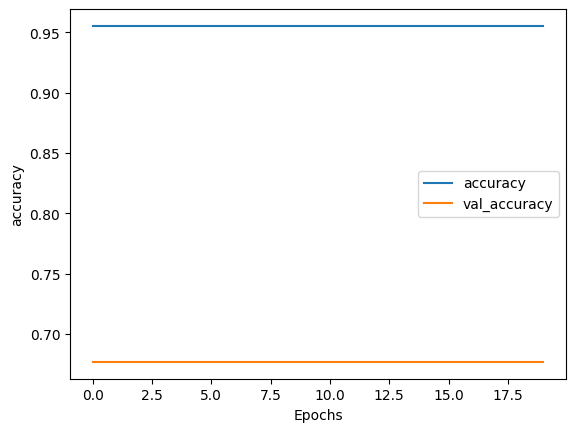

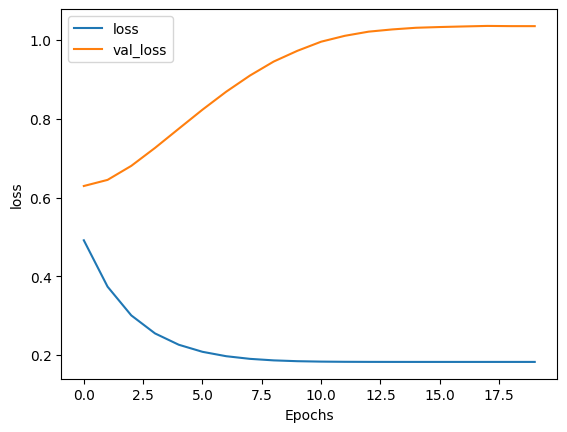

In [60]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [61]:
# sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
# sequences = tokenizer.texts_to_sequences(sentence)
# padded = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
print(model.evaluate(testing_padded,testing_labels))

132/132 [==============================] - 0s 2ms/step - loss: 1.0352 - accuracy: 0.6769
[1.0351529121398926, 0.6768901348114014]
